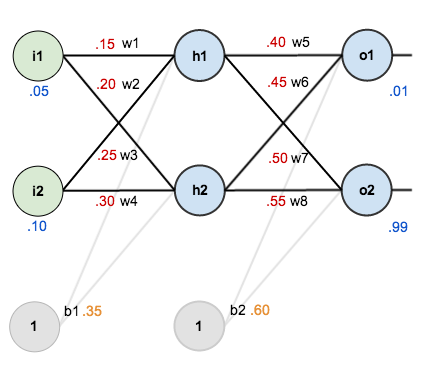

In [1]:
from IPython.display import Image
Image("image.png")

In [15]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb


import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(70000)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        print(f'Iteration: {iter+1}\n========================\n W1: {W1}\n W2: {W2} \n Output: {A2} \n Desired output: {Y} \n Error: {E}\n\n')


main()

Streaming output truncated to the last 5000 lines.
 [ 3.2656  3.3156]] 
 Output: [[0.0103 0.9897]] 
 Desired output: [[0.01 0.99]] 
 Error: 1.0299058174945968e-07


Iteration: 69547
 W1: [[0.3366 0.3818]
 [0.458  0.5136]]
 W2: [[-4.312  -4.262 ]
 [ 3.2656  3.3156]] 
 Output: [[0.0103 0.9897]] 
 Desired output: [[0.01 0.99]] 
 Error: 1.0298259827371305e-07


Iteration: 69548
 W1: [[0.3366 0.3818]
 [0.458  0.5136]]
 W2: [[-4.312  -4.262 ]
 [ 3.2656  3.3156]] 
 Output: [[0.0103 0.9897]] 
 Desired output: [[0.01 0.99]] 
 Error: 1.0297461543572137e-07


Iteration: 69549
 W1: [[0.3366 0.3818]
 [0.458  0.5136]]
 W2: [[-4.312  -4.262 ]
 [ 3.2656  3.3156]] 
 Output: [[0.0103 0.9897]] 
 Desired output: [[0.01 0.99]] 
 Error: 1.0296663323536932e-07


Iteration: 69550
 W1: [[0.3366 0.3818]
 [0.458  0.5136]]
 W2: [[-4.312  -4.262 ]
 [ 3.2656  3.3156]] 
 Output: [[0.0103 0.9897]] 
 Desired output: [[0.01 0.99]] 
 Error: 1.0295865167257258e-07


Iteration: 69551
 W1: [[0.3366 0.3818]
 [0.458  0.5136]

We can see as the number of iterations increase the Error decreases thus accuracy increases. But as the training goes on the rate at which the error goes down will decrease more and more